In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime 

# Assumption

The data must be normally distributed.

Population variance unknown and assumed to be same since market is same

## Read the data

In [3]:
data_frame = pd.read_excel('CI.xlsx',sheet_name='Al Bundy')

In [51]:
data_frame.head()

,Unnamed: 0,Inferential statistics. Confidence intervals,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
3,NaN,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
4,NaN,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [52]:
data_frame.columns = data_frame.iloc[2]

In [53]:
data_frame.head()

2,nan,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,nan,Month,SalePrice
0,NaN,Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
3,NaN,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
4,NaN,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [54]:
data_frame.set_index('InvoiceNo', inplace=True)

In [55]:
data_frame.head()

2,nan,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,nan,Month,SalePrice
InvoiceNo,,,,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,NaN,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
52389,NaN,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
52390,NaN,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


In [56]:
data_frame.columns.name = 'Features'
data_frame.columns = data_frame.columns.str.strip()

In [57]:
data_frame.head()

Features,nan,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,nan,Month,SalePrice
InvoiceNo,,,,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,NaN,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,NaN,Month,SalePrice
52389,NaN,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,2014.0,1,159
52390,NaN,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,2014.0,1,159.2


Can save csv and analyse to see if data is cleanly imported

In [58]:
data_frame.columns

Index([            nan,          'Date',       'Country',     'ProductID',
                'Shop',        'Gender',     'Size (US)', 'Size (Europe)',
           'Size (UK)',     'UnitPrice',      'Discount',             nan,
               'Month',     'SalePrice'],
      dtype='object', name='Features')

In [59]:
data_frame = data_frame.loc[:, data_frame.columns.notnull()]

In [60]:
data_frame.drop('Month', axis=1, inplace=True)

In [61]:
data_frame.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
Al Bundy's shoe shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2


In [62]:
data_frame.dropna(inplace=True)

In [63]:
data_frame.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0,159


In [67]:
data_frame = data_frame.iloc[1:,]

In [68]:
data_frame.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0,159
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0,159
52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9,39-40,7,159,0,159


In [69]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

C:\Users\manuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
data_frame['UnitPrice'] = pd.to_numeric(data_frame['UnitPrice'], errors='ignore')
data_frame['Discount'] = pd.to_numeric(data_frame['Discount'], errors='ignore')
data_frame['SalePrice'] = pd.to_numeric(data_frame['SalePrice'], errors='ignore')

C:\Users\manuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\manuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\manuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [71]:
data_frame.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0.0,159.0
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,159.0
52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9,39-40,7,159,0.0,159.0


In [72]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14967 entries, 52389 to 65777
Data columns (total 11 columns):
Date             14967 non-null datetime64[ns]
Country          14967 non-null object
ProductID        14967 non-null object
Shop             14967 non-null object
Gender           14967 non-null object
Size (US)        14967 non-null object
Size (Europe)    14967 non-null object
Size (UK)        14967 non-null object
UnitPrice        14967 non-null int64
Discount         14967 non-null float64
SalePrice        14967 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.4+ MB


## Extract men data

In [73]:
data_frame['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [74]:
filter_men = data_frame['Gender'] == 'Male'
data_frame_men = data_frame[filter_men]

In [75]:
data_frame_men.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11,44,10.5,159,0.0,159.0
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9,149,0.2,119.2
52394,2014-01-01 15:59:12,United States,2173,US15,Male,10.5,43-44,10,159,0.0,159.0
52396,2014-01-02 09:01:36,Canada,2238,CAN5,Male,10,43,9.5,169,0.0,169.0


In [76]:
#data_frame_men.to_csv('men_data.csv')

## Extract women data

In [77]:
filter_women = data_frame['Gender'] == 'Female'
data_frame_women = data_frame[filter_women]

In [78]:
data_frame_women.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,159.0
52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9,39-40,7,159,0.0,159.0
52395,2014-01-02 01:06:24,Germany,2200,GER2,Female,9,39-40,7,179,0.0,179.0
52398,2014-01-02 13:35:12,United Kingdom,2237,UK1,Female,9,39-40,7,149,0.0,149.0
52399,2014-01-02 14:18:24,United States,2213,US11,Female,9.5,40,7.5,169,0.1,152.1


In [79]:
df_sales_by_country_size = data_frame_men.groupby(['Size (US)', 'Country']).agg({'Country': 'count'}).unstack()

In [80]:
df_sales_by_country_size

Country                                     
Country    Canada Germany United Kingdom United States
Size (US)                                             
6.0            15      30              6            54
6.5            15      18             12            45
7.0            24      30             21            39
7.5            45      48             12            66
8.0            51     117             45           141
8.5           192     174             87           225
9.0           324     348            183           492
9.5           375     549            225           741
10.0          237     411            156           543
10.5          243     453            150           462
11.0          114     156             69           213
11.5           75     129             39           156
12.0           51      78             24            87
13.0           12      33              3            39
14.0           21      30             15            60
15.0           27      48             12            24

In [81]:
df_sales_by_country_size.sum(axis=0) #matched

         Country       
Country  Canada            1821
         Germany           2652
         United Kingdom    1059
         United States     3387
dtype: int64

In [82]:
filter_usa = data_frame_men['Country'] == 'United States'
data_frame_men_usa = data_frame_men[filter_usa]

In [83]:
data_frame_men_usa.head()

Features,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
InvoiceNo,,,,,,,,,,,
52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11,199,0.2,159.2
52394,2014-01-01 15:59:12,United States,2173,US15,Male,10.5,43-44,10,159,0.0,159.0
52397,2014-01-02 09:16:00,United States,2191,US13,Male,10.5,43-44,10,139,0.0,139.0
52399,2014-01-02 14:18:24,United States,2197,US1,Male,10,43,9.5,129,0.0,129.0
52400,2014-01-02 15:59:12,United States,2152,US15,Male,8,41,7.5,139,0.0,139.0


In [84]:
data_frame_men_usa.groupby('Country').count() #match

Features,Date,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
Country,,,,,,,,,,
United States,3387,3387,3387,3387,3387,3387,3387,3387,3387,3387


In [87]:
#data_frame_men_2016 = data_frame_men_usa[(data_frame_men_usa['Date']>=datetime.date(2016,1,1)) & (data_frame_men_usa['Date']<=datetime.date(2016,12,31))]
data_frame_men_2016 = data_frame_men_usa[data_frame_men_usa['Date'].apply(lambda x: x.year == 2016)]

In [88]:
data_frame_men_2016.groupby('Country').count()

Features,Date,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
Country,,,,,,,,,,
United States,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677


In [89]:
df_men_size_month_usa = data_frame_men_2016.groupby([data_frame_men_2016['Date'].dt.strftime('%B'), 'Size (US)']).agg({'Size (US)': 'count'}).unstack().transpose()

In [90]:
df_men_size_month_usa

Date                 April  August  December  February  January  July  June  \
          Size (US)                                                           
Size (US) 6.0          1.0     4.0       NaN       1.0      4.0   3.0   3.0   
          6.5          1.0     7.0       1.0       2.0      3.0   1.0   NaN   
          7.0          NaN     2.0       NaN       NaN      NaN   4.0   4.0   
          7.5          1.0     3.0       1.0       2.0      3.0   7.0   NaN   
          8.0          3.0     4.0       6.0       9.0      7.0   9.0   2.0   
          8.5          8.0    17.0       6.0      12.0     12.0  17.0   9.0   
          9.0         11.0    30.0      10.0      13.0     17.0  25.0  22.0   
          9.5         24.0    47.0      26.0      25.0     19.0  25.0  33.0   
          10.0        19.0    24.0      20.0      26.0     17.0  25.0  31.0   
          10.5        14.0    15.0      10.0      16.0     13.0  18.0  19.0   
          11.0        10.0     8.0       7.0      16.0      5.0  15.0  11.0   
          11.5         3.0     4.0       5.0       3.0      4.0   6.0   5.0   
          12.0         4.0    12.0       1.0       NaN      3.0   3.0   4.0   
          13.0         NaN     NaN       2.0       1.0      1.0   1.0   2.0   
          14.0         3.0     1.0       1.0       6.0      2.0   2.0   3.0   
          15.0         1.0     NaN       2.0       NaN      NaN   4.0   NaN   

Date                 March   May  November  October  September  
          Size (US)                                             
Size (US) 6.0          3.0   3.0       3.0      7.0        3.0  
          6.5          NaN   NaN       2.0      1.0        2.0  
          7.0          1.0   6.0       NaN      NaN        3.0  
          7.5          3.0   7.0       1.0      6.0        4.0  
          8.0          7.0  12.0       2.0      5.0        7.0  
          8.5          8.0  15.0      10.0      9.0        6.0  
          9.0         13.0  21.0      13.0     25.0       26.0  
          9.5         27.0  26.0      37.0     44.0       31.0  
          10.0        26.0  16.0      15.0     31.0       23.0  
          10.5        22.0  28.0      16.0     21.0       19.0  
          11.0        13.0  10.0       6.0      7.0        9.0  
          11.5         6.0   3.0      13.0     12.0        5.0  
          12.0         NaN   4.0       2.0      9.0        4.0  
          13.0         2.0   3.0       3.0      4.0        NaN  
          14.0         3.0   5.0       2.0      1.0        NaN  
          15.0         NaN   1.0       NaN      NaN        NaN

In [91]:
df_men_size_month_usa.fillna(0, inplace=True)

In [92]:
df_men_size_month_usa.columns.name = 'Months 2016'

In [93]:
df_men_size_month_usa.reset_index(level=0, drop=True, inplace=True)

In [94]:
df_men_size_month_usa

Months 2016,April,August,December,February,January,July,June,March,May,November,October,September
Size (US),,,,,,,,,,,,
6.0,1.0,4.0,0.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,7.0,3.0
6.5,1.0,7.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0
7.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,6.0,0.0,0.0,3.0
7.5,1.0,3.0,1.0,2.0,3.0,7.0,0.0,3.0,7.0,1.0,6.0,4.0
8.0,3.0,4.0,6.0,9.0,7.0,9.0,2.0,7.0,12.0,2.0,5.0,7.0
8.5,8.0,17.0,6.0,12.0,12.0,17.0,9.0,8.0,15.0,10.0,9.0,6.0
9.0,11.0,30.0,10.0,13.0,17.0,25.0,22.0,13.0,21.0,13.0,25.0,26.0
9.5,24.0,47.0,26.0,25.0,19.0,25.0,33.0,27.0,26.0,37.0,44.0,31.0
10.0,19.0,24.0,20.0,26.0,17.0,25.0,31.0,26.0,16.0,15.0,31.0,23.0


In [95]:
df_men_size_month_usa.sum() #dec 3 shoe are missing

Months 2016
April        103.0
August       178.0
December      98.0
February     132.0
January      110.0
July         165.0
June         148.0
March        134.0
May          160.0
November     125.0
October      182.0
September    142.0
dtype: float64

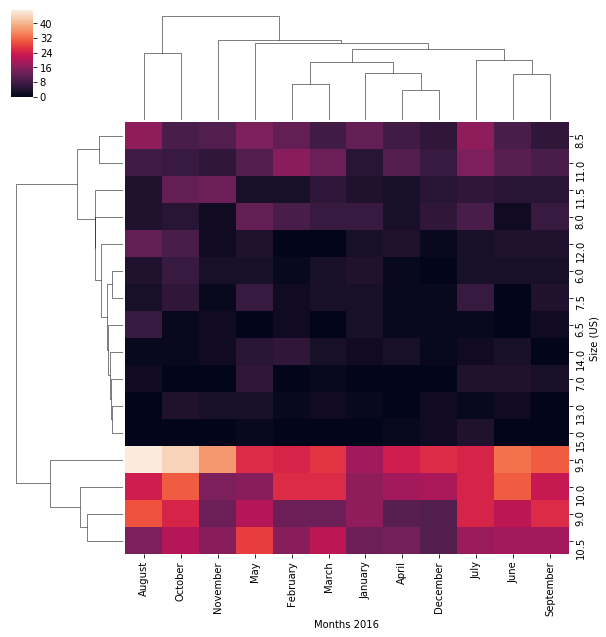

In [96]:
sns.clustermap(df_men_size_month_usa)

In [97]:
def calculate_sem(row):
    return stats.sem(row)

In [98]:
df_men_size_month_usa['SEM'] = df_men_size_month_usa.apply(calculate_sem, axis=1)

In [99]:
df_men_size_month_usa

Months 2016,April,August,December,February,January,July,June,March,May,November,October,September,SEM
Size (US),,,,,,,,,,,,,
6.0,1.0,4.0,0.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,7.0,3.0,0.514315
6.5,1.0,7.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.555050
7.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,6.0,0.0,0.0,3.0,0.607196
7.5,1.0,3.0,1.0,2.0,3.0,7.0,0.0,3.0,7.0,1.0,6.0,4.0,0.694495
8.0,3.0,4.0,6.0,9.0,7.0,9.0,2.0,7.0,12.0,2.0,5.0,7.0,0.882990
8.5,8.0,17.0,6.0,12.0,12.0,17.0,9.0,8.0,15.0,10.0,9.0,6.0,1.122261
9.0,11.0,30.0,10.0,13.0,17.0,25.0,22.0,13.0,21.0,13.0,25.0,26.0,1.968823
9.5,24.0,47.0,26.0,25.0,19.0,25.0,33.0,27.0,26.0,37.0,44.0,31.0,2.447427
10.0,19.0,24.0,20.0,26.0,17.0,25.0,31.0,26.0,16.0,15.0,31.0,23.0,1.567303


In [2]:
def calculate_confidence_interval(row):
    # 12 features, DOF 12-1
    return stats.t.interval(0.95, (12-1), loc=row[0:-2].mean(), scale=row['SEM']) 

In [101]:
df_men_size_month_usa['CONFIDENCE'] = df_men_size_month_usa.apply(calculate_confidence_interval, axis=1)

In [102]:
df_men_size_month_usa

Months 2016,April,August,December,February,January,July,June,March,May,November,October,September,SEM,CONFIDENCE
Size (US),,,,,,,,,,,,,,
6.0,1.0,4.0,0.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,7.0,3.0,0.514315,"(1.7770906213790914, 4.041091196802727)"
6.5,1.0,7.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.555050,"(0.4147062173874605, 2.8580210553398127)"
7.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,6.0,0.0,0.0,3.0,0.607196,"(0.2090253663174888, 2.881883724591602)"
7.5,1.0,3.0,1.0,2.0,3.0,7.0,0.0,3.0,7.0,1.0,6.0,4.0,0.694495,"(1.562336017360069, 4.6194821644581125)"
8.0,3.0,4.0,6.0,9.0,7.0,9.0,2.0,7.0,12.0,2.0,5.0,7.0,0.882990,"(4.056551643544477, 7.943448356455523)"
8.5,8.0,17.0,6.0,12.0,12.0,17.0,9.0,8.0,15.0,10.0,9.0,6.0,1.122261,"(8.711738429159869, 13.651897934476494)"
9.0,11.0,30.0,10.0,13.0,17.0,25.0,22.0,13.0,21.0,13.0,25.0,26.0,1.968823,"(13.848468746830694, 22.515167616805673)"
9.5,24.0,47.0,26.0,25.0,19.0,25.0,33.0,27.0,26.0,37.0,44.0,31.0,2.447427,"(24.885976734058595, 35.65947781139595)"
10.0,19.0,24.0,20.0,26.0,17.0,25.0,31.0,26.0,16.0,15.0,31.0,23.0,1.567303,"(19.277661591317905, 26.17688386322755)"


In [103]:
def inventory_prediction(CI):
    return int(round(CI[1], 0))

In [104]:
df_men_size_month_usa['PREDICTION'] = df_men_size_month_usa['CONFIDENCE'].apply(inventory_prediction)

In [105]:
df_men_size_month_usa

Months 2016,April,August,December,February,January,July,June,March,May,November,October,September,SEM,CONFIDENCE,PREDICTION
Size (US),,,,,,,,,,,,,,,
6.0,1.0,4.0,0.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,7.0,3.0,0.514315,"(1.7770906213790914, 4.041091196802727)",4
6.5,1.0,7.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.555050,"(0.4147062173874605, 2.8580210553398127)",3
7.0,0.0,2.0,0.0,0.0,0.0,4.0,4.0,1.0,6.0,0.0,0.0,3.0,0.607196,"(0.2090253663174888, 2.881883724591602)",3
7.5,1.0,3.0,1.0,2.0,3.0,7.0,0.0,3.0,7.0,1.0,6.0,4.0,0.694495,"(1.562336017360069, 4.6194821644581125)",5
8.0,3.0,4.0,6.0,9.0,7.0,9.0,2.0,7.0,12.0,2.0,5.0,7.0,0.882990,"(4.056551643544477, 7.943448356455523)",8
8.5,8.0,17.0,6.0,12.0,12.0,17.0,9.0,8.0,15.0,10.0,9.0,6.0,1.122261,"(8.711738429159869, 13.651897934476494)",14
9.0,11.0,30.0,10.0,13.0,17.0,25.0,22.0,13.0,21.0,13.0,25.0,26.0,1.968823,"(13.848468746830694, 22.515167616805673)",23
9.5,24.0,47.0,26.0,25.0,19.0,25.0,33.0,27.0,26.0,37.0,44.0,31.0,2.447427,"(24.885976734058595, 35.65947781139595)",36
10.0,19.0,24.0,20.0,26.0,17.0,25.0,31.0,26.0,16.0,15.0,31.0,23.0,1.567303,"(19.277661591317905, 26.17688386322755)",26


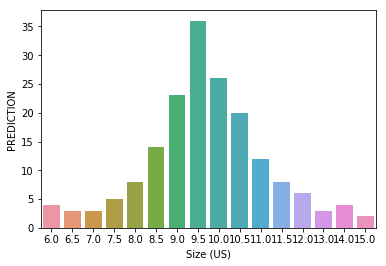

In [106]:
sns.barplot(x=df_men_size_month_usa.index, y="PREDICTION", data=df_men_size_month_usa)

In [107]:
df = pd.DataFrame(df_men_size_month_usa.iloc[:, :-3].transpose().unstack()).reset_index()

In [108]:
df.rename(columns = {0:'Sales'}, inplace=True)

In [109]:
df.head()

,Size (US),Months 2016,Sales
0,6.0,April,1.0
1,6.0,August,4.0
2,6.0,December,0.0
3,6.0,February,1.0
4,6.0,January,4.0


group1,group2,meandiff,lower,upper,reject
6.0,6.5,-1.25,-6.9021,4.4021,False
6.0,7.0,-1.25,-6.9021,4.4021,False
6.0,7.5,0.25,-5.4021,5.9021,False
6.0,8.0,3.1667,-2.4855,8.8188,False
6.0,8.5,7.8333,2.1812,13.4855,True
6.0,9.0,15.9167,10.2645,21.5688,True
6.0,9.5,27.4167,21.7645,33.0688,True
6.0,10.0,19.8333,14.1812,25.4855,True
6.0,10.5,14.6667,9.0145,20.3188,True
6.0,11.0,6.8333,1.1812,12.4855,True


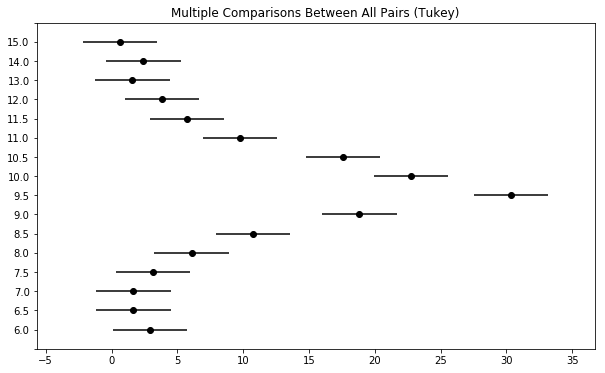

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Sales'],     # Data
                          groups=df['Size (US)'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary